## A notebook to create a bar graph of datasets per organ

This recreates [https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd](https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd) and potentially all other plots for the paper.

## Install and import libraries

In [1]:
%pip install pandas seaborn numpy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Set global variables

In [2]:
hra_pop_version = 'v1.0'
branch = 'main'

## Load data

In [3]:
# set url
raw_url = f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/'

# load data
df_as_datasets_modality = pd.read_csv(f"{raw_url}atlas-ad-hoc/as-datasets-modality.csv")
df_dataset_cell_count_check = pd.read_csv(f"{raw_url}universe-ad-hoc/dataset-cell-count-check.csv")

df_as_datasets_modality

,sex,organId,organ_label,refOrgan,refOrganAs,dataset,tool,modality,as_label
0,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,sc_proteomics,sc_proteomics,sigmoid colon
1,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon
2,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon
3,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon
4,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon
...,...,...,...,...,...,...,...,...,...
3766,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005469,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,right thymus lobe
3767,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005457,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,left thymus lobe
3768,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005469,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,right thymus lobe
3769,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005457,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,left thymus lobe


## Visualize by organ

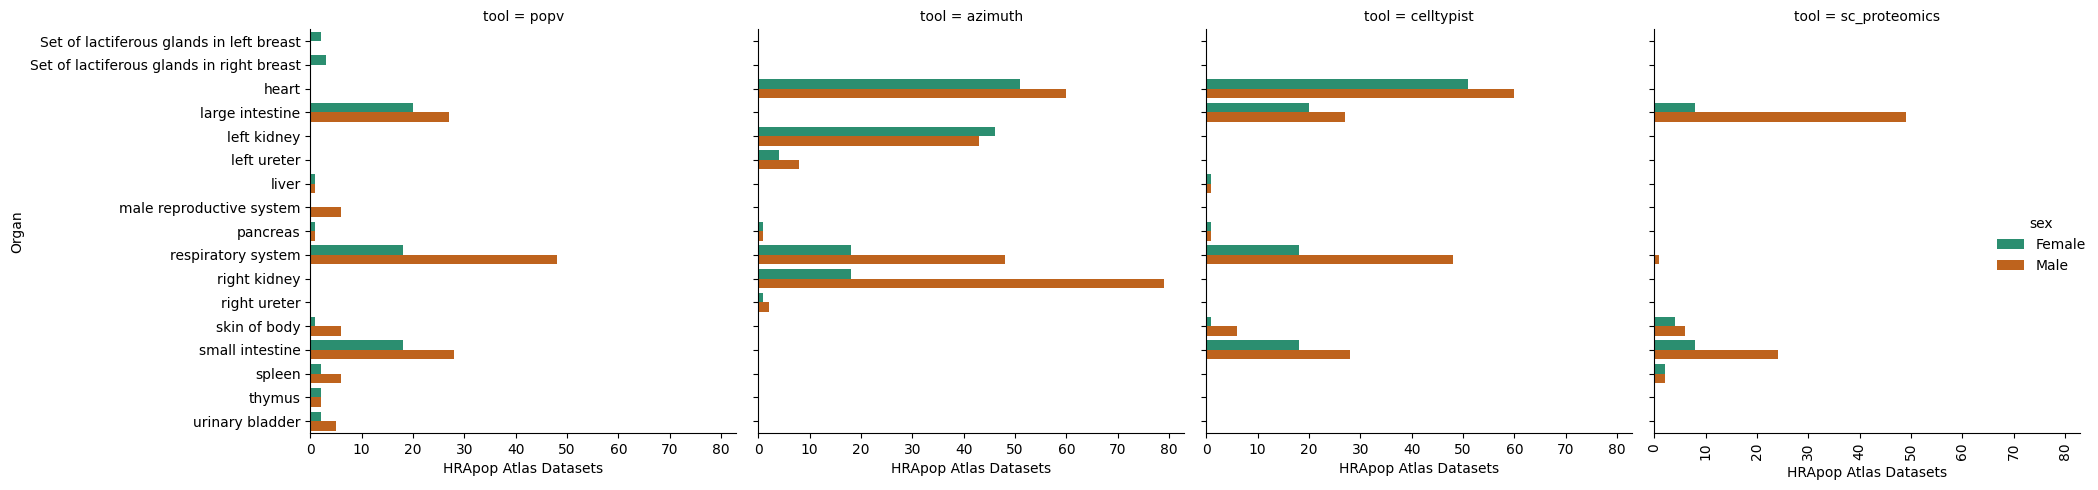

In [4]:
# create a new df that counts unique values in 'values' grouped by 'category' and 'group'
df_unique_counts = df_as_datasets_modality.groupby(['organ_label', 'tool', 'sex'])[
    'dataset'].nunique().reset_index()

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df_unique_counts,
    x='dataset',
    y='organ_label', 
    hue='sex',
    kind='bar', 
    col='tool'
)

g.set_axis_labels("HRApop Atlas Datasets", "Organ")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

## Visualize by AS and organ

In [5]:
sns.set_theme(rc={'figure.figsize': (8, 4.5)})  # width, height in inchdes

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 20,    
    "axes.labelsize": 20,   
    "xtick.labelsize": 17,   
    "ytick.labelsize": 15.5,  
    "legend.fontsize": 17,
    "legend.title_fontsize": 17
})

In [6]:
# create new label in the format {organ}-{AS}
df_as_datasets_modality['as_label_organ'] = df_as_datasets_modality['organ_label'] + ' - ' + df_as_datasets_modality['as_label']
df_as_datasets_modality

,sex,organId,organ_label,refOrgan,refOrganAs,dataset,tool,modality,as_label,as_label_organ
0,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,sc_proteomics,sc_proteomics,sigmoid colon,large intestine - sigmoid colon
1,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
2,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
3,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
4,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon,large intestine - sigmoid colon
...,...,...,...,...,...,...,...,...,...,...
3766,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005469,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,right thymus lobe,thymus - right thymus lobe
3767,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005457,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,left thymus lobe,thymus - left thymus lobe
3768,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005469,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,right thymus lobe,thymus - right thymus lobe
3769,Male,http://purl.obolibrary.org/obo/UBERON_0002370,thymus,https://purl.humanatlas.io/ref-organ/thymus-ma...,http://purl.obolibrary.org/obo/UBERON_0005457,https://api.cellxgene.cziscience.com/dp/v1/col...,popv,sc_transcriptomics,left thymus lobe,thymus - left thymus lobe


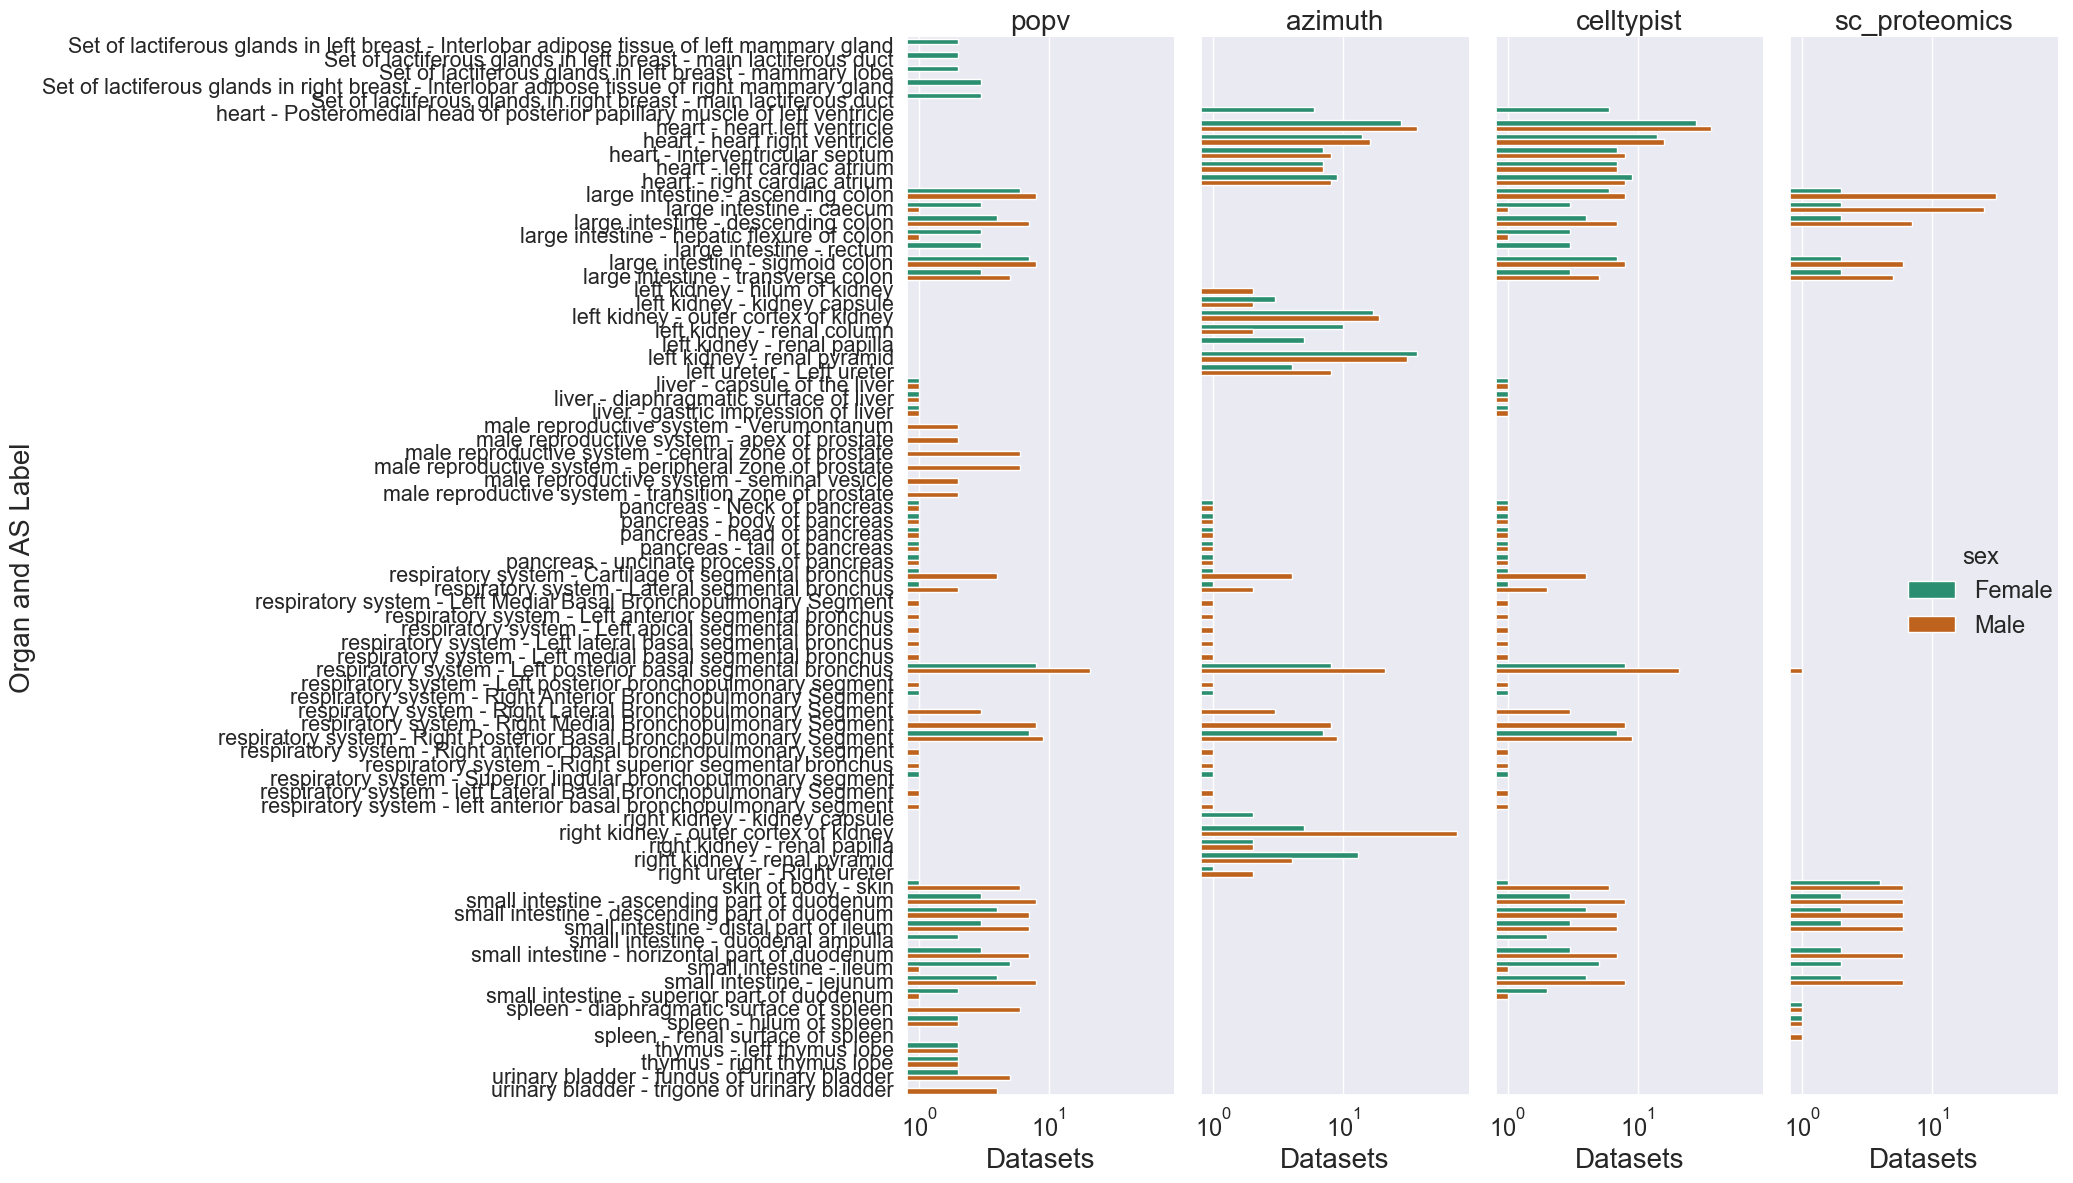

In [7]:
# get number of datasets per organ-as
# create a new df that counts unique values in 'values' grouped by 'category' and 'group'
df_unique_counts_updated_label = df_as_datasets_modality.groupby(['as_label_organ', 'tool', 'sex'])[
    'dataset'].nunique().reset_index()

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df_unique_counts_updated_label,
    x='dataset',
    y='as_label_organ',
    kind='bar',
    col='tool',
    hue='sex',
    # row='sex',
    orient="h",
    height=12,
    aspect=0.4
)

# apply log transform to x-acis
plt.xscale('log')

# Remove row labels by setting them to empty strings
g.row_names = [""] * len(g.row_names)

# # adjust labels
g.set_axis_labels("Datasets", "Organ and AS Label")

for ax in g.axes.flat:
    # get  column value from the subplot's position in the FacetGrid
    col_idx = ax.get_subplotspec().colspan.start
    col_val = g.col_names[col_idx]

    # Set just the column name as the title
    ax.set_title(f"{col_val}")

# Move legend 
# g.legend.set_bbox_to_anchor((.15, .9))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [8]:
# export
g.figure.savefig(f'output/datasetsPerAs.png', dpi=600, bbox_inches='tight')

## Get counts

In [9]:
df_unique_counts_updated_label

,as_label_organ,tool,sex,dataset
0,Set of lactiferous glands in left breast - Int...,popv,Female,2
1,Set of lactiferous glands in left breast - mai...,popv,Female,2
2,Set of lactiferous glands in left breast - mam...,popv,Female,2
3,Set of lactiferous glands in right breast - In...,popv,Female,3
4,Set of lactiferous glands in right breast - ma...,popv,Female,3
...,...,...,...,...
256,thymus - right thymus lobe,popv,Female,2
257,thymus - right thymus lobe,popv,Male,2
258,urinary bladder - fundus of urinary bladder,popv,Female,2
259,urinary bladder - fundus of urinary bladder,popv,Male,5


## Visualize AS-AS similarity

In [10]:
# load data
df_as_as_sim = pd.read_csv(
    f"{raw_url}atlas/figure-as-as-sim.csv")

df_as_as_sim

,organId,organ,sex,modality,as1_label,as2_label,cosine_sim,as1_dataset_count,as2_dataset_count
0,UBERON:0004538,left kidney,Male,sc_transcriptomics,renal papilla,renal column,0.072046,9,12
1,UBERON:0004539,right kidney,Male,sc_transcriptomics,renal papilla,renal column,0.072046,9,12
2,UBERON:0004539,right kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.254614,9,85
3,UBERON:0004539,right kidney,Female,sc_transcriptomics,renal papilla,kidney pyramid,0.702682,9,85
4,UBERON:0004538,left kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.254614,9,85
...,...,...,...,...,...,...,...,...,...
372,UBERON:0001004,respiratory system,Female,sc_transcriptomics,Cartilage of segmental bronchus,Right anterior bronchopulmonary segment,0.337082,5,1
373,UBERON:0000948,heart,Male,sc_transcriptomics,right cardiac atrium,left cardiac atrium,0.777919,17,14
374,UBERON:0000059,large intestine,Female,sc_transcriptomics,transverse colon,hepatic flexure of colon,0.389122,15,4
375,UBERON:0000059,large intestine,Female,sc_transcriptomics,caecum,hepatic flexure of colon,0.524230,31,4


In [11]:
# get data for vis
df_heatmap = df_as_as_sim[['organ', 'sex', 'modality','as1_label', 'as2_label', 'cosine_sim']]
df_heatmap

,organ,sex,modality,as1_label,as2_label,cosine_sim
0,left kidney,Male,sc_transcriptomics,renal papilla,renal column,0.072046
1,right kidney,Male,sc_transcriptomics,renal papilla,renal column,0.072046
2,right kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.254614
3,right kidney,Female,sc_transcriptomics,renal papilla,kidney pyramid,0.702682
4,left kidney,Male,sc_transcriptomics,renal papilla,kidney pyramid,0.254614
...,...,...,...,...,...,...
372,respiratory system,Female,sc_transcriptomics,Cartilage of segmental bronchus,Right anterior bronchopulmonary segment,0.337082
373,heart,Male,sc_transcriptomics,right cardiac atrium,left cardiac atrium,0.777919
374,large intestine,Female,sc_transcriptomics,transverse colon,hepatic flexure of colon,0.389122
375,large intestine,Female,sc_transcriptomics,caecum,hepatic flexure of colon,0.524230


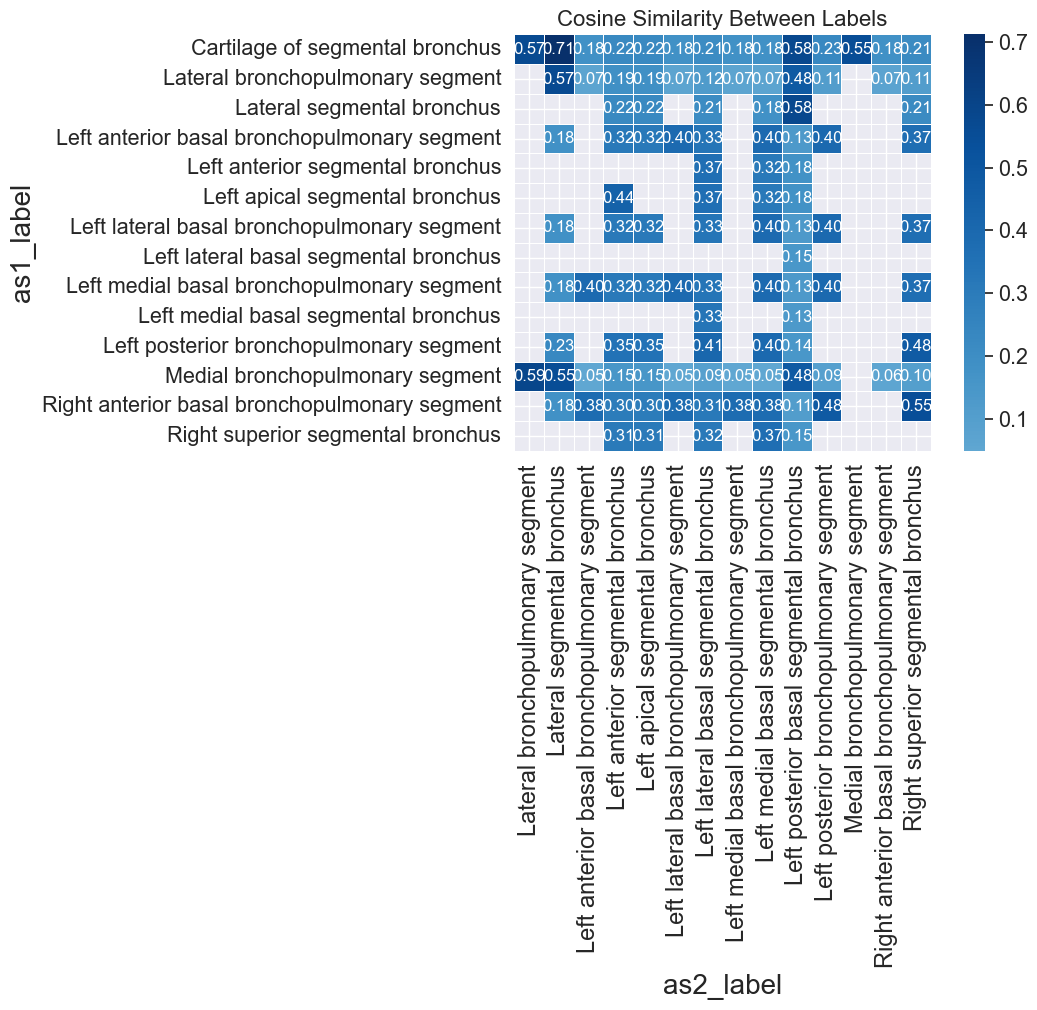

In [12]:
# Filter for a specific combination first, e.g.:
filtered_df = df_heatmap[(df_heatmap['organ'] == 'respiratory system') &
                         (df_heatmap['sex'] == 'Male') &
                         (df_heatmap['modality'] == 'sc_transcriptomics')]

# Then create the pivot table and heatmap
pivot_df = filtered_df.pivot_table(index='as1_label',
                                   columns='as2_label',
                                   values='cosine_sim')


# Create the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(pivot_df,
                      annot=True,  # Show the cosine similarity values
                      cmap='Blues',  # Blue color palette
                      fmt='.2f',  # Show 2 decimal places
                      linewidths=0.5,
                      center=0,
                      square=True)

plt.title('Cosine Similarity Between Labels', fontsize=16)
plt.tight_layout()
plt.show()